In [2]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit

In [3]:
# Define Functions
def Z(k,T):
    return 4*np.pi*T/(np.sqrt(3)*k)
def U(x,y,k):
    return k/2*(x**2 + y**2 + x*y)
def S(x,y,k,T):
    return 1/(Z(k,T))*np.exp(-U(x,y,k)/T)
def curve_func(x, a, b):
    return a*np.array(x) + b

### Solving For A Single Average

In [ ]:
# Variables
N=1400
k = 2.5
T = 100
dist = 5*np.sqrt(T/k)

x_ensemble = []
y_ensemble = []

# Initialize a tqdm counter
pbar = tqdm(total=N, desc='Processing ensembles')

while len(x_ensemble) < N:
    xrand = random.uniform(-dist,dist)
    yrand = random.uniform(-dist,dist)
    gammarand = random.uniform(0,1)

    S_val = S(xrand, yrand, k, T)
    
    if S_val > gammarand:
        x_ensemble.append(xrand)
        y_ensemble.append(yrand**2)
        
        # Update the progress bar
        pbar.update(1)

pbar.close()

x_mean = np.mean(x_ensemble)
y_mean = np.mean(y_ensemble)

x_std = np.std(x_ensemble)
y_std = np.std(y_ensemble)

print(f"X mean is {x_mean:.3f}. Y² mean is {y_mean/T*k:.3f}T/k.")
print(f"X std is {x_std:.3f}. Y² std is {y_std/T*k:.3f}T/k.")
print(f"Len x is {len(x_ensemble)}. Len y is {len(y_ensemble)}.")

### Average For Each Update

100%|███████████████████████████████████████████| 15/15 [03:35<00:00, 14.34s/it]


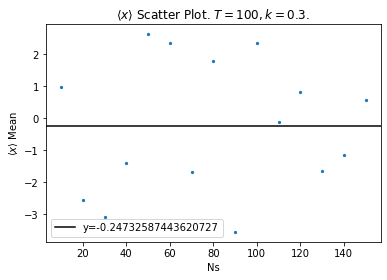

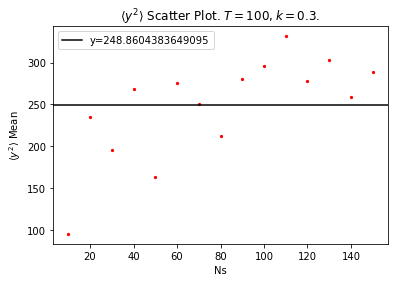

In [28]:
# Variables
N=150
k = 2.5
T = 500
dist = 5*np.sqrt(T/k)
x_low, x_up = -dist, dist
y_low, y_up = -dist, dist


i = 0

Ns = list(range(10,N+1,10))

# Initialize a tqdm counter
#pbar = tqdm(total=300, desc='Processing x_ensemble')

x_means = []
y_means = []

for N in tqdm(Ns):
    x_ensemble = []
    y_ensemble = []
    
    while len(x_ensemble) < N:
        xrand = random.uniform(-dist,dist)
        yrand = random.uniform(-dist,dist)
        gammarand = random.uniform(0,1)

        S_val = S(xrand, yrand, k, T)

        if S_val > gammarand:
            x_ensemble.append(xrand)
            y_ensemble.append(yrand**2)

            # Update the progress bar
            #pbar.update(1)
    
    x_mean = np.nanmean(x_ensemble)
    y_mean = np.nanmean(y_ensemble)   
    
    x_means.append(x_mean)
    y_means.append(y_mean)
        #i += 1

# Data for the first plot
plt.scatter(Ns, x_means, s=5)
plt.title(r'$\langle x \rangle$ Scatter Plot. $T=100, k=0.3$.')
plt.xlabel('Ns')
plt.ylabel(r'$\langle x \rangle$ Mean')
totalxmean = np.nanmean(x_means)
plt.axhline(y=totalxmean, color='black', label=f'y={totalxmean}')
plt.legend()
plt.show()

# Data for the second plot
plt.scatter(Ns, y_means, s=5, color='red')
plt.title(r'$\langle y^{2} \rangle$ Scatter Plot. $T=100, k=0.3$.')
plt.xlabel('Ns')
plt.ylabel(r'$\langle y^{2} \rangle$ Mean')
totalymean = np.nanmean(y_means)
plt.axhline(y=totalymean, color='black', label=f'y={totalymean}')
plt.legend()
plt.show()

### Monte Carlo Average by K-Value

Processing x_ensemble: 100%|████████████████████| 17/17 [01:16<00:00,  4.48s/it]


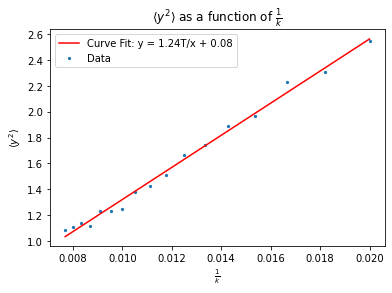

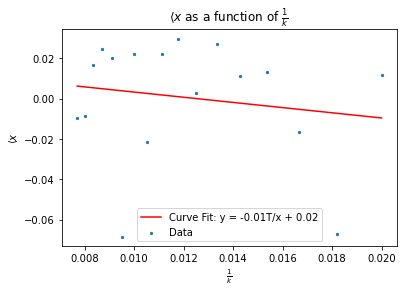

In [157]:
# Variables
N=1500
T = 100
dist = 5*np.sqrt(T/k)

ks = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]
x_means = []
y_means = []

# Initialise a tqdm counter
pbar = tqdm(total=len(ks), desc='Processing x_ensemble')

for k in ks:
    x_ensemble = []
    y_ensemble = []
    
    while len(x_ensemble) < N:
        xrand = random.uniform(-dist,dist)
        yrand = random.uniform(-dist,dist)
        gammarand = random.uniform(0,1)

        S_val = S(xrand, yrand, k, T)

        if S_val > gammarand:
            x_ensemble.append(xrand)
            y_ensemble.append(yrand**2)

    x_mean = np.nanmean(x_ensemble)
    y_mean = np.nanmean(y_ensemble)
    
    x_means.append(x_mean)
    y_means.append(y_mean)
    
    # Update the progress bar
    pbar.update(1)

pbar.close()

ks_inv = [1/i for i in ks]
b

popt, pcov = curve_fit(curve_func, ks_inv, y_means)
a_opt, b_opt = popt

popt, pcov = curve_fit(curve_func, ks_inv, x_means)
a_opt_x, b_opt_x = popt

plt.scatter(ks_inv, y_means, s=5, label='Data')
plt.plot(ks_inv, curve_func(ks_inv, a_opt, b_opt), 'r-', label='Curve Fit: y = {:.2f}T/x + {:.2f}'.format(a_opt/T, b_opt))
plt.xlabel(r'$\frac{1}{k}$')
plt.ylabel(r'$\langle y^{2} \rangle$')
plt.title(r'$\langle y^{2} \rangle$ as a function of $\frac{1}{k}$')
plt.legend()
plt.show()

plt.scatter(ks_inv, x_means, s=5, label='Data')
plt.plot(ks_inv, curve_func(ks_inv, a_opt_x, b_opt_x), 'r-', label='Curve Fit: y = {:.2f}T/x + {:.2f}'.format(a_opt_x/T, b_opt_x))
plt.xlabel(r'$\frac{1}{k}$')
plt.ylabel(r'$\langle x$')
plt.title(r'$\langle x$ as a function of $\frac{1}{k}$')
plt.legend()
plt.show()

### Monte Carlo Average by T-Value

Processing x_ensemble: 100%|████████████████████| 11/11 [01:13<00:00,  6.67s/it]


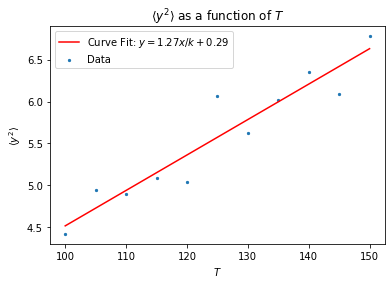

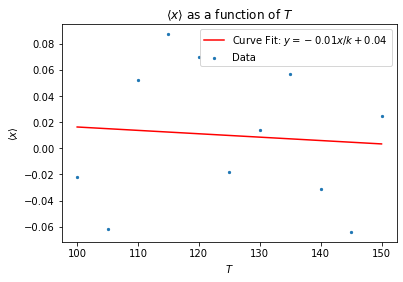

In [156]:
# Variables
N=1500
k = 30
dist = 5*np.sqrt(T/k)

Ts = [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150]
x_means = []
y_means = []

# Initialize a tqdm counter
pbar = tqdm(total=len(Ts), desc='Processing x_ensemble')

for T in Ts:
    x_ensemble = []
    y_ensemble = []
    
    while len(x_ensemble) < N:
        xrand = random.uniform(-dist,dist)
        yrand = random.uniform(-dist,dist)
        gammarand = random.uniform(0,1)

        S_val = S(xrand, yrand, k, T)

        if S_val > gammarand:
            x_ensemble.append(xrand)
            y_ensemble.append(yrand**2)

    x_mean = np.nanmean(x_ensemble)
    y_mean = np.nanmean(y_ensemble)
    
    x_means.append(x_mean)
    y_means.append(y_mean)
    
    # Update the progress bar
    pbar.update(1)

pbar.close()

popt, pcov = curve_fit(curve_func, Ts, y_means)
a_opt_y, b_opt_y = popt

popt, pcov = curve_fit(curve_func, Ts, x_means)
a_opt_x, b_opt_x = popt

plt.scatter(Ts, y_means, s=5, label='Data')
plt.plot(Ts, curve_func(Ts, a_opt_y, b_opt_y), 'r-', label='Curve Fit: $y = {:.2f}x/k + {:.2f}$'.format(a_opt_y*k, b_opt_y))
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle y^{2} \rangle$')
plt.title(r'$\langle y^{2} \rangle$ as a function of $T$')
plt.legend()
plt.show()

plt.scatter(Ts, x_means, s=5, label='Data')
plt.plot(Ts, curve_func(Ts, a_opt_x, b_opt_x), 'r-', label='Curve Fit: $y = {:.2f}x/k + {:.2f}$'.format(a_opt_x*k, b_opt_x))
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle x \rangle$')
plt.title(r'$\langle x \rangle$ as a function of $T$')
plt.legend()
plt.show()

In [160]:
y_ensemble

[0.004058056700622044,
 0.1757851387833457,
 2.824361041668035,
 0.06991422737868941,
 0.8322962216642461,
 0.28540683298209724,
 0.5684290925733869,
 0.857614360443044,
 0.5921764635769523,
 3.3093073927758825,
 0.5899530614236934,
 1.5608494107316102,
 0.7844646461279472,
 3.6737696362573122,
 0.24155865122478734,
 0.0013218203156140482,
 1.5476065658693399,
 0.12202981915494893,
 0.007564716671007331,
 0.863057322667306,
 0.10227571106676303,
 0.4277660754488022,
 0.05066394657969441,
 1.4241829893791866,
 0.233558284700011,
 0.11771123525514766,
 0.08501324291625073,
 0.8614315817920779,
 0.053202062797802936,
 0.962077569211028,
 0.08284244571899502,
 0.16796379431570796,
 0.3911726654683828,
 0.04910875896229224,
 0.5438902268780896,
 0.12118463839649432,
 0.0003193583783026269,
 0.041653171802601884,
 0.47079325360096663,
 0.8466301326142363,
 0.001023884891799474,
 0.03138771831164745,
 0.4050346343885258,
 1.034434613000336,
 2.6059665027230894,
 0.6497574953074693,
 0.0204450

In [25]:
# Variables
N=1400
k = 2.5
T = 100
dist = 5*np.sqrt(T/k)

x_ensemble = []
y_ensemble = []

# Initialize a tqdm counter
pbar = tqdm(total=N, desc='Processing x_ensemble')

while len(x_ensemble) < N:
    xrand = random.uniform(-dist,dist)
    yrand = random.uniform(-dist,dist)
    gammarand = random.uniform(0,1)

    S_val = S(xrand, yrand, k, T)
    
    if S_val > gammarand:
        x_ensemble.append(xrand)
        y_ensemble.append(yrand**2)
        
        # Update the progress bar
        pbar.update(1)

pbar.close()

x_mean = np.mean(x_ensemble)
y_mean = np.mean(y_ensemble)

x_std = np.std(x_ensemble)
y_std = np.std(y_ensemble)

print(f"X mean is {x_mean:.3f}. Y² mean is {y_mean/T*k:.3f}T/k.")
print(f"X std is {x_std:.3f}. Y² std is {y_std/T*k:.3f}T/k.")
print(f"Len x is {len(x_ensemble)}. Len y is {len(y_ensemble)}.")

Processing x_ensemble: 100%|████████████████| 1400/1400 [00:46<00:00, 30.00it/s]

X mean is -0.023. Y² mean is 1.324T/k.
X std is 7.342. Y² std is 1.926T/k.
Len x is 1400. Len y is 1400.
